In [168]:
import numpy as np
import pandas as pd

In [169]:
df = pd.read_excel('spam.xlsx')

In [170]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
458,ham,1.20 that call cost. Which i guess isnt bad. M...,NaN,NaN,NaN
3340,ham,Still i have not checked it da. . .,NaN,NaN,NaN
2842,ham,"Tunji, how's the queen? how are you doing. Thi...",NaN,NaN,NaN
5511,ham,"It‰Û÷s reassuring, in this crazy world.",NaN,NaN,NaN
4533,ham,I have no money 4 steve mate! !,NaN,NaN,NaN


In [171]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [173]:
#dropping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [174]:
df.sample(5)

,v1,v2
2160,ham,No. Its not specialisation. Can work but its s...
353,ham,Yo you guys ever figure out how much we need f...
2774,ham,"Dude u knw also telugu..thts gud..k, gud nyt.."
5150,ham,Happy new year to u and ur family...may this n...
1444,ham,Those ducking chinchillas


In [175]:
#renaming the colums
df.rename(columns={'v1':'target', 'v2':'message'}, inplace=True)
df.sample(5)

,target,message
3197,ham,7 lor... Change 2 suntec... Wat time u coming?
4019,ham,University of southern california.
4444,ham,"2 celebrate my båÕday, y else?"
4791,ham,Gd luck 4 ur exams :-)
1215,ham,that would be good ‰Û_ I'll phone you tomo lun...


In [176]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [177]:
df['target'] = encoder.fit_transform(df['target'])

In [178]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
#missing values
df.isnull().sum()

target     0
message    0
dtype: int64

In [180]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [181]:
df.duplicated().sum()

0

In [182]:
df.shape

(5169, 2)

# 2. EDA

In [183]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [184]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

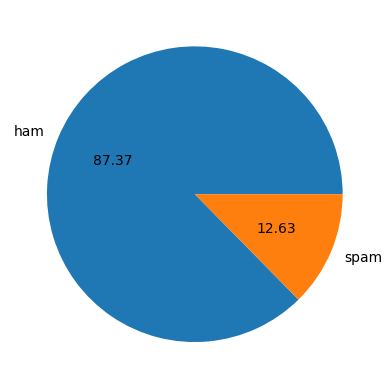

In [185]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

### Data is imbalanced

In [186]:
!pip install nltk

In [187]:
import nltk

In [188]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHAITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##### 1. Adding a column storing number of characters in corresponding message

In [189]:
df['message'] = df['message'].astype(str)
df['num_chars'] = df['message'].apply(len)

In [190]:
df.head()

,target,message,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


##### 2. Adding a column for storing number of words in the corresponding message

In [191]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [192]:
df.head()

,target,message,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


##### 3. Adding a column storing number of sentences in the corresponding message

In [193]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [194]:
df.head()

,target,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [195]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [196]:
#for only ham messages
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [197]:
#only for spam messages
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [198]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

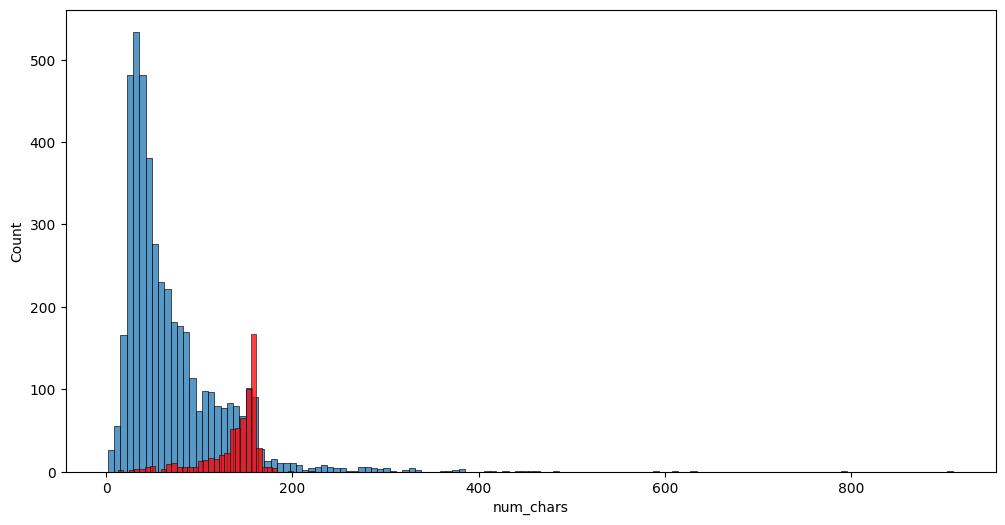

In [199]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

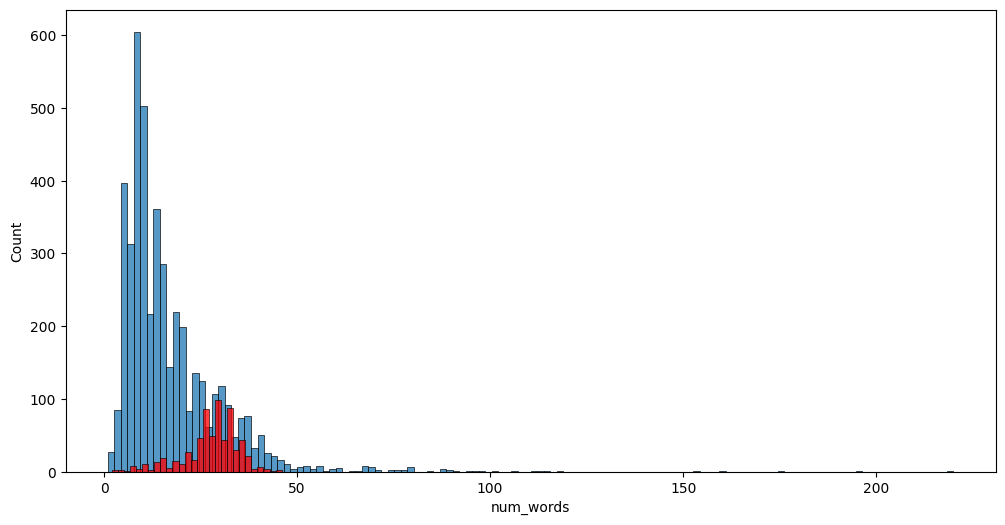

In [200]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

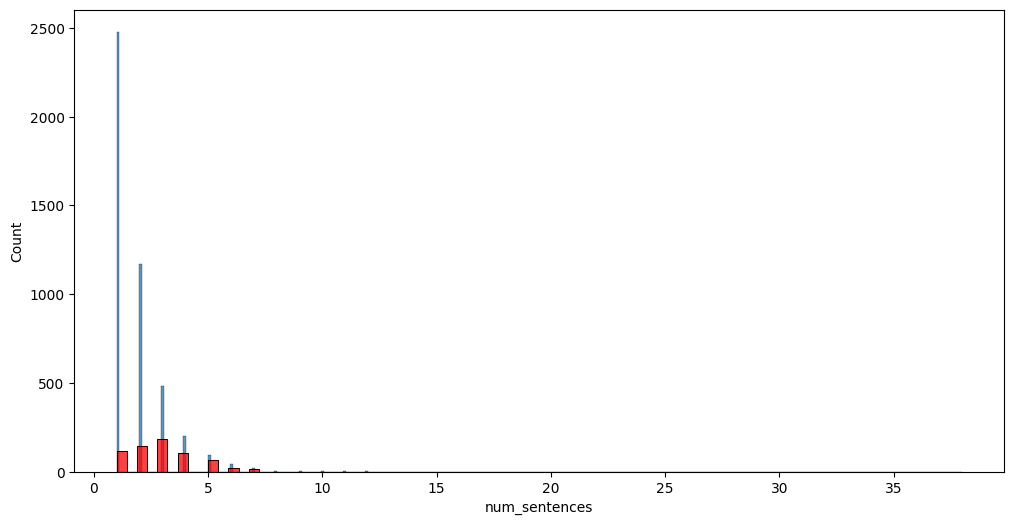

In [201]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

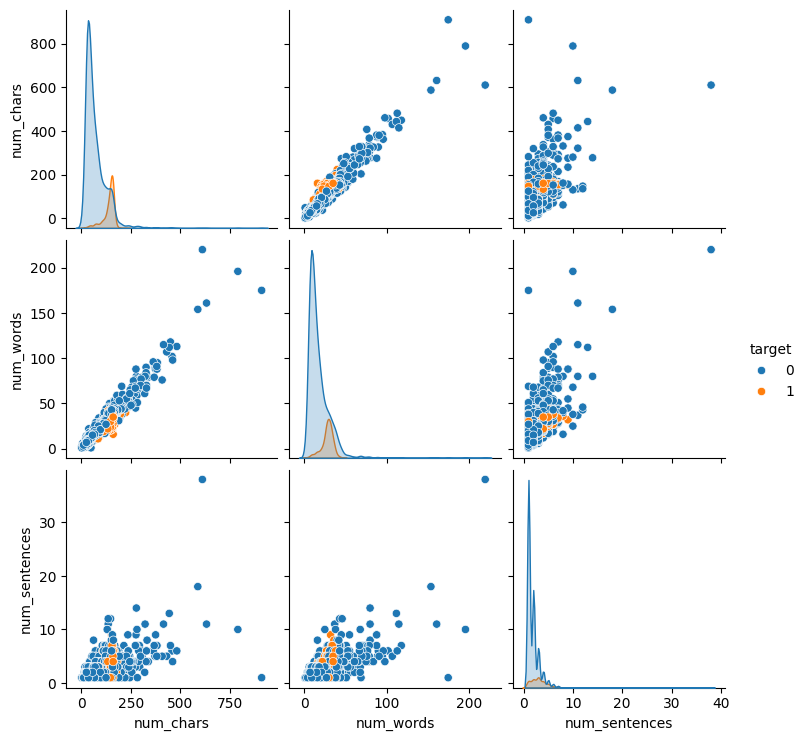

In [202]:
#Relation of three columns with each other
sns.pairplot(df, hue='target')

<Axes: >

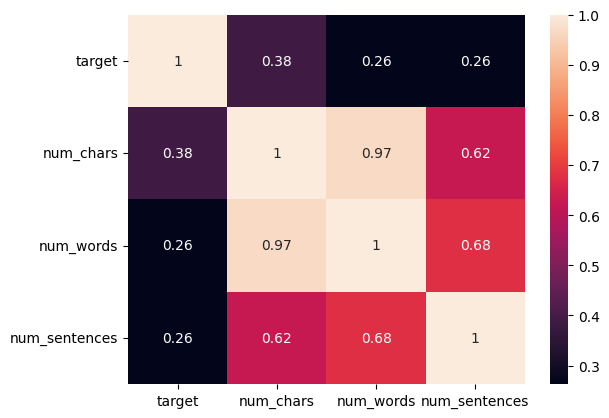

In [203]:
#Analyizing by finding correlation coefficient and using it to plot a heatmap
columns_to_include = df.columns[df.columns != 'message']
corr_matrix = df[columns_to_include].corr()
sns.heatmap(corr_matrix, annot=True)

#### We conclude from above heatmap that num_chars is the most correlated to target as compared to the other. Also, the three meaures are highly correlated internally so for analysis and prediction we have to keep only one column which will be our 'num_chars' column.

# 3. Data Preprocessing
#### -> Lower Case
#### -> Tokenization
#### -> Removing Special Characters
#### -> Removing Stop words and Punctuation
#### -> Stemming

In [204]:
import nltk

In [205]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHAITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
from nltk.corpus import stopwords
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [207]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [208]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [209]:
df['transformed_text'] = df['message'].apply(transform_text)

In [210]:
df.head()

,target,message,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [211]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [212]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

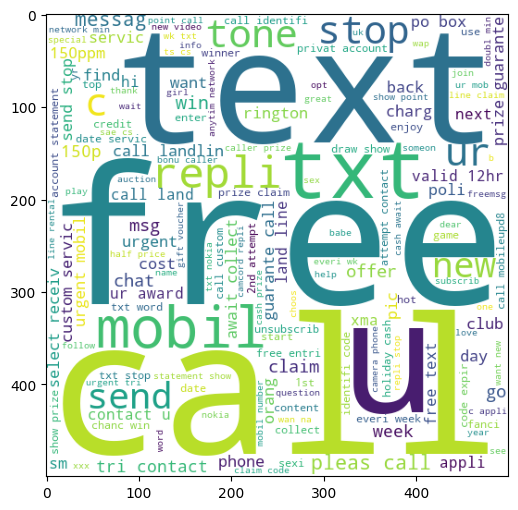

In [213]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [214]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

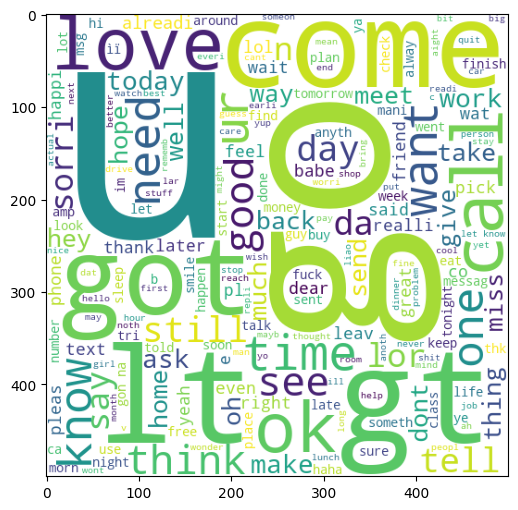

In [215]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [216]:
df.head()

,target,message,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [217]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [218]:
len(spam_corpus)

9939

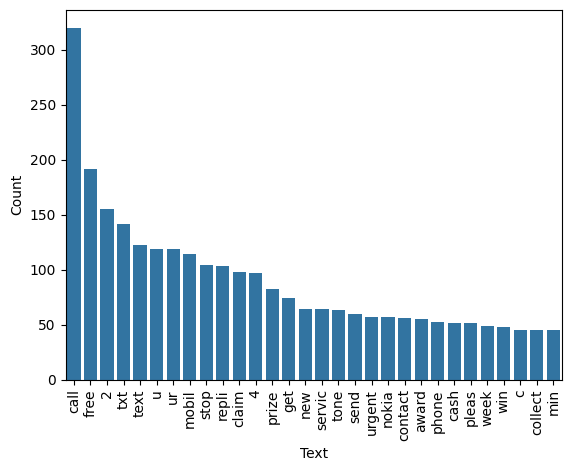

In [219]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is your list of text data
spam_counts = Counter(spam_corpus).most_common(30)
df2 = pd.DataFrame(spam_counts, columns=['Text', 'Count'])

sns.barplot(x='Text', y='Count', data=df2)
plt.xticks(rotation='vertical')
plt.show()


In [220]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [221]:
len(ham_corpus)

35402

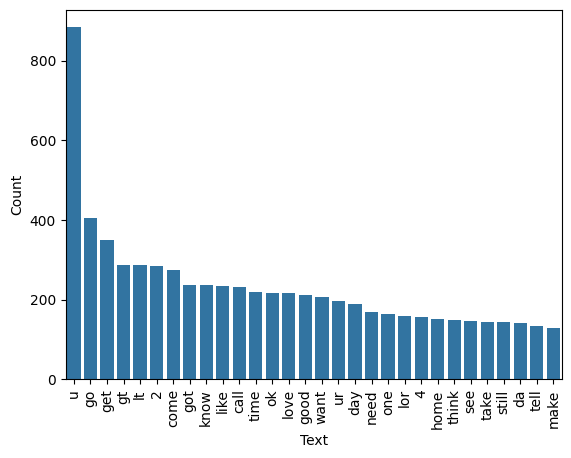

In [222]:
ham_counts = Counter(ham_corpus).most_common(30)
df3 = pd.DataFrame(ham_counts, columns=['Text', 'Count'])

sns.barplot(x='Text', y='Count', data=df3)
plt.xticks(rotation='vertical')
plt.show()

In [223]:
df.head()

,target,message,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. MODEL BUILDING

In [224]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [225]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [226]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [227]:
# appending the num_character col to X
X = np.hstack((X,df['num_chars'].values.reshape(-1,1)))

In [228]:
X.shape

(5169, 3001)

In [229]:
y = df['target'].values

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [232]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [233]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [234]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8926499032882012
[[802  94]
 [ 17 121]]
0.5627906976744186


In [235]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[890   6]
 [ 22 116]]
0.9508196721311475


In [236]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


### # tfidf --> MNB

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [238]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [239]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [240]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [241]:
train_classifier(svc,X_train,y_train,X_test,y_test)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [242]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8839458413926499
Precision -  0.8214285714285714
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For  DT
Accuracy -  0.9448742746615088
Precision -  0.8785046728971962
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9819819819819819


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.965183752417795
Precision -  0.9180327868852459
For  BgC
Accuracy -  0.965183752417795
Precision -  0.9047619047619048
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9326923076923077
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [243]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [244]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.970019,0.981982
8,ETC,0.979691,0.975610
4,LR,0.967118,0.964286
2,NB,0.972921,0.950820
10,xgb,0.968085,0.933884
9,GBDT,0.953578,0.932692
6,AdaBoost,0.965184,0.918033
7,BgC,0.965184,0.904762
3,DT,0.944874,0.878505
1,KN,0.883946,0.821429


In [245]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [246]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.970019
1,ETC,Accuracy,0.979691
2,LR,Accuracy,0.967118
3,NB,Accuracy,0.972921
4,xgb,Accuracy,0.968085
5,GBDT,Accuracy,0.953578
6,AdaBoost,Accuracy,0.965184
7,BgC,Accuracy,0.965184
8,DT,Accuracy,0.944874
9,KN,Accuracy,0.883946


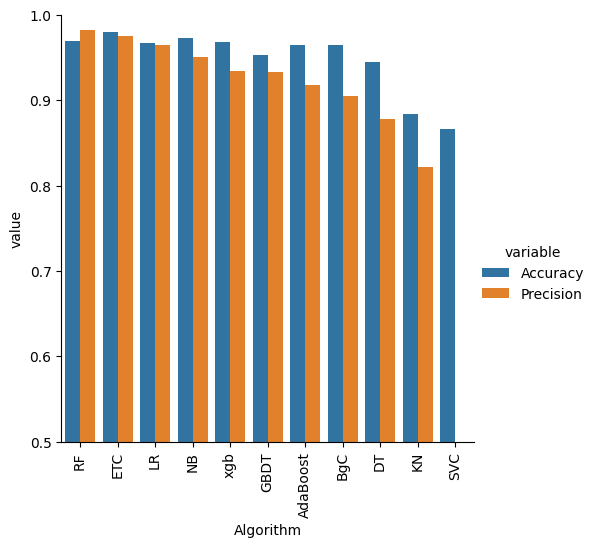

In [247]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#### model improve
#### 1. Change the max_features parameter of TfIdf

In [248]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [249]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [250]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [251]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [252]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [253]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.970019,0.981982,0.970019,0.981982,0.970019,0.981982,0.970019,0.981982
1,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
2,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
3,NB,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
4,xgb,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884
5,GBDT,0.953578,0.932692,0.953578,0.932692,0.953578,0.932692,0.953578,0.932692
6,AdaBoost,0.965184,0.918033,0.965184,0.918033,0.965184,0.918033,0.965184,0.918033
7,BgC,0.965184,0.904762,0.965184,0.904762,0.965184,0.904762,0.965184,0.904762
8,DT,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505
9,KN,0.883946,0.821429,0.883946,0.821429,0.883946,0.821429,0.883946,0.821429


In [263]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [264]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [265]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [266]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
Precision 1.0


In [267]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [268]:
from sklearn.ensemble import StackingClassifier

In [269]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [270]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9384615384615385


In [272]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))